## 텍스트 정규화

### 토큰화

In [1]:
from nltk import sent_tokenize
import nltk
# nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 스톱워드 제거

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/heeju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print('영어 stop words 개수 :', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
for sentence in word_tokens:
    filtered_words = []
    
    for word in sentence : 
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('wokring'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

wokr work work
amus amus amus
happy happiest
fant fanciest


In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /Users/heeju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## BOW

In [9]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

In [10]:
from scipy import sparse

data = np.array([3, 1, 2])

row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [11]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [12]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])
                  
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

## 뉴스그룹 분류 실습

In [14]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)

In [15]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [16]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [17]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [18]:
from sklearn.datasets import fetch_20newsgroups

train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                random_state=156)

X_train = train_news.data
y_train = train_news.target

test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                               random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data),
      len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVecotrizer Shape :', X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVecotrizer Shape : (11314, 101631)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(
    accuracy_score(y_test, pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.617


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.678


In [22]:
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.690


In [23]:
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(
    accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


In [24]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')),
                     ('lr_clf', LogisticRegression(random_state=156))])

In [25]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(
    accuracy_score(y_test, pred)))

Pipeline을 통한 Logistic Regression의 예측 정확도는 0.704


In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1, 5, 10]
}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)} 0.7550828826229531
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.702


## 감성분석

In [27]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [28]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [29]:
import re

review_df['review'] = review_df['review'].str.replace('<br />', ' ')

review_df['review'] = review_df['review'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))

In [30]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2) )),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8859, ROC-AUC는 0.9503


In [32]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2) )),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


In [33]:
import nltk
# nltk.download('all')

In [34]:
from nltk.corpus import wordnet as wn

term = 'present'

synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 개수 :', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 개수 : 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [35]:
for synset in synsets:
    print('##### Synset name :', synset.name(), '#####')
    print('POS :', synset.lexname())
    print('Definition :', synset.definition())
    print('Lemmas :', synset.lemma_names())

##### Synset name : present.n.01 #####
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas : ['present', 'nowadays']
##### Synset name : present.n.02 #####
POS : noun.possession
Definition : something presented as a gift
Lemmas : ['present']
##### Synset name : present.n.03 #####
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking
Lemmas : ['present', 'present_tense']
##### Synset name : show.v.01 #####
POS : verb.perception
Definition : give an exhibition of to an interested audience
Lemmas : ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name : present.v.02 #####
POS : verb.communication
Definition : bring forward and present to the mind
Lemmas : ['present', 'represent', 'lay_out']
##### Synset name : stage.v.01 #####
POS : verb.creation
Definition : perform (a play), especially on a stage
Lemmas : ['stage', 'present', 're

In [36]:
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

for entity in entities :
    similarity = [round(entity.path_similarity(compared_entity), 2)
                  for compared_entity in entities]
    similarities.append(similarity)
    
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [37]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수 :', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수 : 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [38]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수 :', father.pos_score())
print('father 부정감성 지수 :', father.neg_score())
print('father 객관성 지수 :', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수 :', fabulous.pos_score())
print('fabulous 부정감성 지수 :', fabulous.neg_score())

father 긍정감성 지수 : 0.0
father 부정감성 지수 : 0.0
father 객관성 지수 : 1.0


fabulous 긍정감성 지수 : 0.875
fabulous 부정감성 지수 : 0.125


In [39]:
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    
    for raw_sentence in raw_sentences :
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
                
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
            
        if not tokens_count:
            return 0
        
        if sentiment >= 0:
            return 1
    return 0

In [41]:
review_df['preds'] = review_df['review'].apply(lambda x : swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도 :', np.round(accuracy_score(y_target, preds), 4))
print('정밀도 :', np.round(precision_score(y_target, preds), 4))
print('재현율 :', np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도 : 0.6613
정밀도 : 0.6472
재현율 : 0.7091


In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)                           

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [44]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도 :', np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도 :', np.round(precision_score(y_target, vader_preds), 4))
print('재현율 :', np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도 : 0.6956
정밀도 : 0.6491
재현율 : 0.8514


In [60]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

count_vect = CountVectorizer(max_df = 0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


In [62]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [63]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [69]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
feature_names = count_vect.get_feature_names_out()

display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## 문서군집화 실습

In [73]:
import pandas as pd
import glob, os
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)

current_dir = os.getcwd()
print("현재 작업 디렉토리:", current_dir)

# 상대 경로로 경로 설정
relative_path = "OpinosisDataset1.0/topics"
path = os.path.join(current_dir, relative_path)
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinion_text = []

for file_ in all_files :
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    filename_ = os.path.basename(file_)
    file_name = os.path.splitext(filename_)[0]
    
    filename_list.append(file_name)  # 변수 이름 수정
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

현재 작업 디렉토리: /Users/heeju/Desktop/camp31/파이썬 머신러닝 완벽가이드


,filename,opinion_text
0,battery-life_ipod_nano_8gb.txt,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
1,gas_mileage_toyota_camry_2007.txt,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...
2,room_holiday_inn_london.txt,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u..."
3,location_holiday_inn_london.txt,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo..."
4,staff_bestwestern_hotel_sfo.txt,Staff are friendl...


In [77]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words='english', \
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [80]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [81]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb.txt,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,3
1,gas_mileage_toyota_camry_2007.txt,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,0
2,room_holiday_inn_london.txt,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",2
3,location_holiday_inn_london.txt,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",4
4,staff_bestwestern_hotel_sfo.txt,Staff are friendl...,4


In [82]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
18,comfort_honda_accord_2008.txt,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",0
43,comfort_toyota_camry_2007.txt,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",0
1,gas_mileage_toyota_camry_2007.txt,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,0
45,interior_honda_accord_2008.txt,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,0
22,interior_toyota_camry_2007.txt,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",0
35,mileage_honda_accord_2008.txt,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",0
47,performance_honda_accord_2008.txt,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",0
42,quality_toyota_camry_2007.txt,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,0
29,seats_honda_accord_2008.txt,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",0
23,transmission_toyota_camry_2007.txt,"After slowing down, transmission has to be kicked to speed up .\n0 ...",0


In [83]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
33,accuracy_garmin_nuvi_255W_gps.txt,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",1
26,buttons_amazon_kindle.txt,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",1
34,directions_garmin_nuvi_255W_gps.txt,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,1
48,display_garmin_nuvi_255W_gps.txt,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",1
36,eyesight-issues_amazon_kindle.txt,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",1
21,features_windows7.txt,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",1
44,fonts_amazon_kindle.txt,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",1
38,navigation_amazon_kindle.txt,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",1
41,price_amazon_kindle.txt,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",1
10,satellite_garmin_nuvi_255W_gps.txt,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",1


In [84]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
31,bathroom_bestwestern_hotel_sfo.txt,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",2
2,room_holiday_inn_london.txt,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",2
46,rooms_bestwestern_hotel_sfo.txt,"Great Location , Nice Rooms , H...",2
30,rooms_swissotel_chicago.txt,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",2


In [85]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,battery-life_amazon_kindle.txt,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",3
0,battery-life_ipod_nano_8gb.txt,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,3
11,battery-life_netbook_1005ha.txt,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",3
12,keyboard_netbook_1005ha.txt,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",3
15,performance_netbook_1005ha.txt,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",3
25,screen_ipod_nano_8gb.txt,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",3
37,screen_netbook_1005ha.txt,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...,3
7,size_asus_netbook_1005ha.txt,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",3
24,sound_ipod_nano_8gb.txt,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,3
14,video_ipod_nano_8gb.txt,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ...",3


In [86]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
17,food_holiday_inn_london.txt,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,4
32,food_swissotel_chicago.txt,The food for our event was delicious .\n0 ...,4
49,free_bestwestern_hotel_sfo.txt,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,4
39,location_bestwestern_hotel_sfo.txt,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",4
3,location_holiday_inn_london.txt,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",4
50,parking_bestwestern_hotel_sfo.txt,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,4
28,price_holiday_inn_london.txt,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",4
16,service_bestwestern_hotel_sfo.txt,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",4
27,service_holiday_inn_london.txt,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",4
13,service_swissotel_hotel_chicago.txt,Mediocre room and service for a very extravagant price .\n0 ...,4


In [87]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
50,parking_bestwestern_hotel_sfo.txt,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,0
27,service_holiday_inn_london.txt,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",0
28,price_holiday_inn_london.txt,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",0
30,rooms_swissotel_chicago.txt,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",0
20,staff_swissotel_chicago.txt,"The staff at Swissotel were not particularly nice .\n0 Each time I waited at the counter for staff for several minutes and then was waved to the desk upon my turn with no hello or anything, or apology for waiting in line .\n1 ...",0
31,bathroom_bestwestern_hotel_sfo.txt,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",0
32,food_swissotel_chicago.txt,The food for our event was delicious .\n0 ...,0
17,food_holiday_inn_london.txt,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,0
16,service_bestwestern_hotel_sfo.txt,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",0
13,service_swissotel_hotel_chicago.txt,Mediocre room and service for a very extravagant price .\n0 ...,0


In [89]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [106]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, 
                        top_n_features=10):
    cluster_details = {}
    
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                            top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_featurfes_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [107]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('##### Cluster {0}'.format(cluster_num))
        print('Top features :', cluster_detail['top_features'])
        print('Reviews 파일명 :', cluster_detail['filenames'][:7])
        print('===========================================')

In [108]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features : ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['room_holiday_inn_london.txt', 'location_holiday_inn_london.txt', 'staff_bestwestern_hotel_sfo.txt', 'service_swissotel_hotel_chicago.txt', 'service_bestwestern_hotel_sfo.txt', 'food_holiday_inn_london.txt', 'staff_swissotel_chicago.txt']
##### Cluster 1
Top features : ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['battery-life_ipod_nano_8gb.txt', 'voice_garmin_nuvi_255W_gps.txt', 'speed_garmin_nuvi_255W_gps.txt', 'size_asus_netbook_1005ha.txt', 'screen_garmin_nuvi_255W_gps.txt', 'battery-life_amazon_kindle.txt', 'satellite_garmin_nuvi_255W_gps.txt']
##### Cluster 2
Top features : ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['gas_mileage_toyota_camry_2007.txt', 'comfort_honda_accord

## 문서유사도

In [109]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))) * np.sqrt(sum(np.square(v2)))
    similarity = dot_product / l2_norm
    
    return similarity

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland', 
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [112]:
feature_vect_dense = feature_vect_simple.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


In [113]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


In [114]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [115]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [116]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape :', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape : (3, 3)


In [118]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

current_dir = os.getcwd()

# 상대 경로로 경로 설정
relative_path = "OpinosisDataset1.0/topics"
path = os.path.join(current_dir, relative_path)
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinion_text = []

for file_ in all_files :
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    filename_ = os.path.basename(file_)
    file_name = os.path.splitext(filename_)[0]
    
    filename_list.append(file_name)  # 변수 이름 수정
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [122]:
from sklearn.metrics.pairwise import cosine_similarity

car_indexes = document_df[document_df['cluster_label'] == 2].index
print('자동차로 클러스터링 된 문서들의 DataFrame Index :', car_indexes)

comparison_docname = document_df.iloc[car_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[car_indexes[0]], feature_vect[car_indexes])
print(similarity_pair)

자동차로 클러스터링 된 문서들의 DataFrame Index : Index([1, 18, 22, 23, 29, 35, 42, 43, 45, 47], dtype='int64')
##### 비교 기준 문서명  gas_mileage_toyota_camry_2007.txt 와 타 문서 유사도 #####
[[1.         0.15655631 0.0879083  0.08217817 0.06276647 0.96608144
  0.14398794 0.27273923 0.05452321 0.20206332]]


가장 유사도가 큰 파일명 및 유사도 : 
 filename      mileage_honda_accord_2008.txt
similarity                         0.966081
Name: 35, dtype: object


Text(0.5, 1.0, 'gas_mileage_toyota_camry_2007.txt')

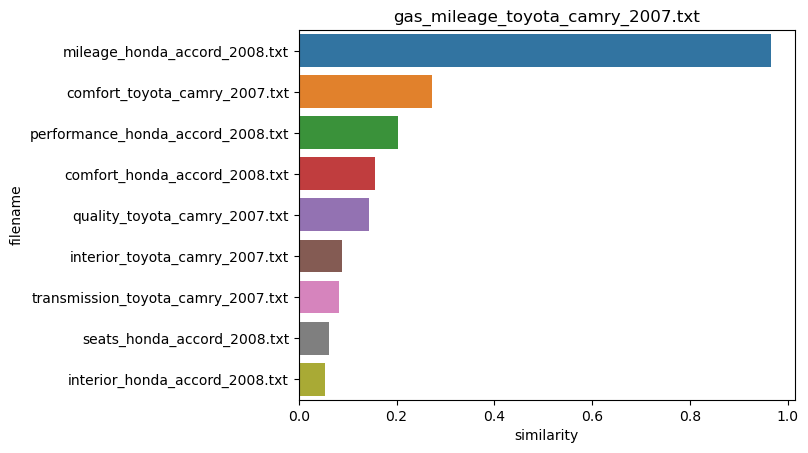

In [123]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

car_sorted_indexes = car_indexes[sorted_index.reshape(-1)]

car_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
car_1_sim_value = car_1_sim_value[1:]

car_1_sim_df = pd.DataFrame()
car_1_sim_df['filename'] = document_df.iloc[car_sorted_indexes]['filename']
car_1_sim_df['similarity'] = car_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도 : \n', car_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=car_1_sim_df)
plt.title(comparison_docname)

## 네이버 영화 평점 감성 분석

In [127]:
# pip install konlpy

In [129]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [130]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [133]:
import re

train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [134]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [136]:
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [138]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 :', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도 : 0.86172


## 캐글 실습

In [139]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"


In [140]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


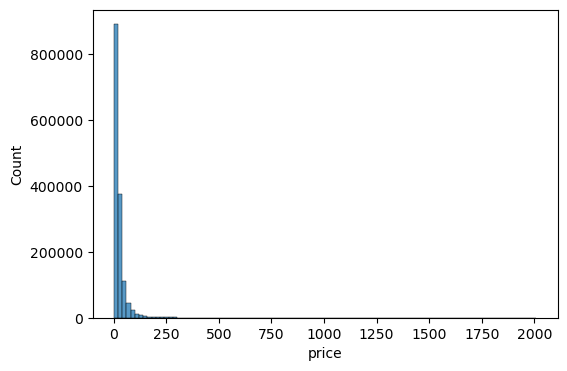

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_df = mercari_df['price']
plt.figure(figsize=(6, 4))
sns.histplot(y_train_df, bins=100)
plt.show()

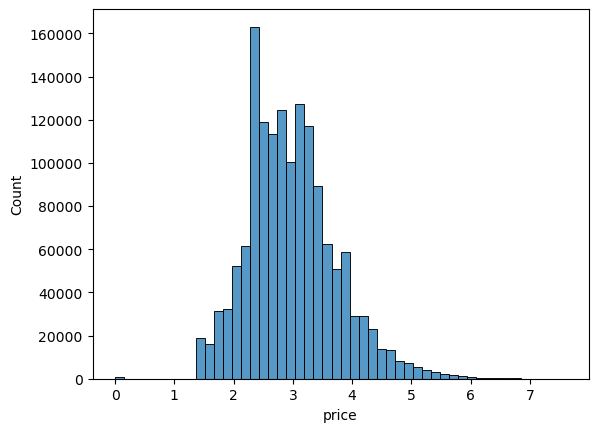

In [143]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins=50)
plt.show()

In [144]:
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [146]:
print('Shipping 값 유형 :\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형 :\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형 :
 shipping
0    819435
1    663100
Name: count, dtype: int64
item_condition_id 값 유형 :
 item_condition_id
1    640549
3    432161
2    375479
4     31962
5      2384
Name: count, dtype: int64


In [147]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [149]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']
    
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :\n', mercari_df['cat_jung'].nunique())
print('소분류 개수 :\n', mercari_df['cat_so'].nunique())

대분류 유형 :
 cat_dae
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: count, dtype: int64
중분류 개수 :
 114
소분류 개수 :
 871


In [150]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [151]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 :\n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : 4810
brand name sample 5건 :
 brand_name
Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: count, dtype: int64


In [153]:
print('name의 종류 개수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name의 종류 개수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [155]:
pd.set_option('max_colwidth', 200)
print('item_description 평균 문자열 크기 :', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기 : 145.71139703278507


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [158]:
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1, 3), stop_words = 'english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape :', X_name.shape)
print('item_description vectorization shape :', X_descp.shape)

name vectorization shape : (1482535, 105757)
item_description vectorization shape : (1482535, 50000)


In [160]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name = LabelBinarizer(sparse_output=True)

X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [161]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape : {0}, X_item_cond_id shape : {1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape : {0}, X_cat_dae shape : {1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape : {0}, X_cat_so shape : {1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand shape : (1482535, 4810), X_item_cond_id shape : (1482535, 5)
X_shipping shape : (1482535, 1), X_cat_dae shape : (1482535, 11)
X_cat_jung shape : (1482535, 114), X_cat_so shape : (1482535, 871)


In [162]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


3

In [163]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [166]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    X = hstack(matrix_list).tocsr()
    
    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'],
                                                        test_size = 0.2, random_state=156)
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [167]:
linear_model = Ridge(solver = 'lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값 :', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,\
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 포함한 rmsle 값 :', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값 : 0.49839668011134325
Item Description을 포함한 rmsle 값 : 0.4680231135449976


In [168]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test= model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값 :', evaluate_org_price(y_test, lgbm_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 78.231898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068421
[LightGBM] [Info] Number of data points in the train set: 1186028, number of used features: 65338
[LightGBM] [Info] Start training from score 2.979514
LightGBM rmsle 값 : 0.4562664499998407


In [169]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle값 :', evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle값 : 0.4465184933575322
